In [5]:
import sklearn as sk
import pandas as pd
from pandas import DataFrame as df
import csv
import scipy
from scipy.optimize import linprog
import math

In [6]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
def load_file_from_excel(file_path):
    df = pd.ExcelFile(file_path)
    df = pd.read_excel(df, df.sheet_names[0])
    return df

In [5]:
rbull= load_file_from_excel("/Users/nitya/Downloads/PythonForDataScience-master/data/RagingBull_FB_Hourly.xlsx")

In [6]:
rbull.head()

,RowId,LastRunTime,actions_onsite_conversion.messaging_delete_message_1d_click,action_type_offline_conversion.custom.151290702323686,actions_onsite_conversion.messaging_delete_message_value,action_type_post_reaction,actions_post_value,actions_onsite_conversion.messaging_first_reply_value,actions_offline_conversion.custom.151290702323686_7d_view,actions_offline_conversion.custom.169926400319048_value,...,LeadgenOther1dayClick,actions_leadgen.other_value,LeadgenOther7dayClick,LeadgenOther28dayView,Conversions,TrafficSource,CampaignType,ProductType,TrueAdSetName,ClientName
0,42578489,2018-07-04 05:56:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,Facebook,NaN,NaN,NaN,Raging Bull
1,42498069,2018-07-04 05:56:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,Facebook,NaN,NaN,NaN,Raging Bull
2,16220724,2018-06-15 23:49:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,Facebook,NaN,NaN,NaN,Raging Bull
3,33403510,2018-06-28 23:47:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,Facebook,NaN,NaN,NaN,Raging Bull
4,22792447,2018-06-17 23:50:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0,Facebook,NaN,NaN,NaN,Raging Bull


In [7]:
rbull.columns

Index(['RowId', 'LastRunTime',
       'actions_onsite_conversion.messaging_delete_message_1d_click',
       'action_type_offline_conversion.custom.151290702323686',
       'actions_onsite_conversion.messaging_delete_message_value',
       'action_type_post_reaction', 'actions_post_value',
       'actions_onsite_conversion.messaging_first_reply_value',
       'actions_offline_conversion.custom.151290702323686_7d_view',
       'actions_offline_conversion.custom.169926400319048_value',
       ...
       'LeadgenOther1dayClick', 'actions_leadgen.other_value',
       'LeadgenOther7dayClick', 'LeadgenOther28dayView', 'Conversions',
       'TrafficSource', 'CampaignType', 'ProductType', 'TrueAdSetName',
       'ClientName'],
      dtype='object', length=314)

In [8]:
rbull1 = rbull[['DateStart','AdId','InlineLinkClicks','Conversions','Spend','Impressions']]


In [9]:
rbull1.head()

,DateStart,AdId,InlineLinkClicks,Conversions,Spend,Impressions
0,2018-06-11,6095175488837,0,0,0.15,7
1,2018-06-05,6094256063237,0,0,0.01,5
2,2018-05-17,6093228859437,0,0,0.13,7
3,2018-05-30,6093541565637,0,0,0.64,26
4,2018-05-19,6093553496037,0,0,0.11,3


In [7]:
rbull= load_file_from_excel("/Users/nitya/Downloads/PythonForDataScience-master/data/rbull1.xlsx")

In [25]:
rbull.head()

,date,id,clicks,conversions,cost,impressions
0,2018-05-01,23842875301030600,2,1,4.360000,227
1,2018-05-01,23842872626260600,1,0,5.520258,263
2,2018-05-01,23842875301030600,5,2,5.340000,278
3,2018-05-01,23842860746290600,0,0,0.070000,1
4,2018-05-01,23842872626260600,5,1,13.080612,702


In [2]:
rbull['CTR']=rbull['clicks']/rbull['impressions']

NameError: name 'rbull' is not defined

In [26]:
rbull['CPS']=rbull['conversions']/rbull['cost']

In [27]:
rbull['CLPS']=rbull['clicks']/rbull['cost']

In [ ]:
rbull.drop('date',inplace=True,axis=1)
rbull.drop('id',inplace=True,axis=1)
rbull.drop('clicks',inplace=True,axis=1)
rbull.drop('conversions',inplace=True,axis=1)
rbull.drop('cost',inplace=True,axis=1)
rbull.drop('impressions',inplace=True,axis=1)

In [87]:
rbull.drop('date',inplace=True,axis=1)
rbull.drop('Year',inplace=True,axis=1)


In [26]:
rbull['date'] = pd.to_datetime(rbull['date'], format='%d-%m-%Y')

In [27]:
rbull['Year'] = rbull['date'].dt.year
rbull['Month'] = rbull['date'].dt.month

In [28]:
Month=rbull.groupby('Month')

In [29]:
Month_counts=Month.aggregate(sum)

In [30]:
Month_counts

,id,clicks,conversions,cost,impressions,Year
Month,,,,,,
5,5.496838e+20,31437.0,9111.0,93070.560074,3605530.0,159654070.0
6,8.356483e+20,27080.0,5517.0,79646.870001,3014226.0,293629090.0
7,9.767317e+18,1320.0,333.0,3491.800005,138899.0,13879804.0


In [31]:
MONTH_WISE=['May','June','July']

In [32]:
Month_counts.index=MONTH_WISE

In [33]:
Month_counts['CTR']=Month_counts['clicks']/Month_counts['impressions']
Month_counts['CPS']=Month_counts['conversions']/Month_counts['cost']
Month_counts['CLPS']=Month_counts['clicks']/Month_counts['cost']

In [34]:
Month_counts

,id,clicks,conversions,cost,impressions,Year,CTR,CPS,CLPS
May,5.496838e+20,31437.0,9111.0,93070.560074,3605530.0,159654070.0,0.008719,0.097893,0.337776
June,8.356483e+20,27080.0,5517.0,79646.870001,3014226.0,293629090.0,0.008984,0.069268,0.340001
July,9.767317e+18,1320.0,333.0,3491.800005,138899.0,13879804.0,0.009503,0.095366,0.378029


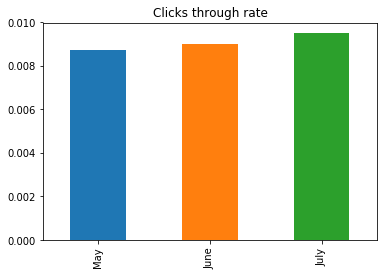

In [35]:
Month_counts['CTR'].plot(kind='bar',title="Clicks through rate")

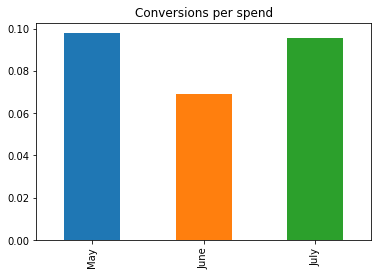

In [36]:
Month_counts['CPS'].plot(kind='bar',title="Conversions per spend")

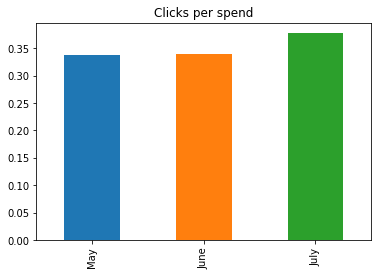

In [37]:
Month_counts['CLPS'].plot(kind='bar',title="Clicks per spend")

In [38]:
AD=rbull.groupby('id')

In [39]:
AD_counts=AD.aggregate(sum)
AD_counts

,clicks,conversions,cost,impressions,Year,Month
id,,,,,,
6088935321237,0,0,6.40,75,64576,160
6088935321437,5,1,20.58,536,78702,195
6088935333637,13,2,89.07,1572,78702,195
6088935334437,2,0,25.48,381,76684,190
6088935350037,7,3,28.74,624,72648,180
6088935350837,0,0,0.45,15,26234,65
6088935363037,1,0,3.07,41,42378,105
6088935363237,3,0,7.12,97,64576,160
6088935365037,1,0,5.71,107,62558,155


In [40]:
AD_counts

,clicks,conversions,cost,impressions,Year,Month
id,,,,,,
6088935321237,0,0,6.40,75,64576,160
6088935321437,5,1,20.58,536,78702,195
6088935333637,13,2,89.07,1572,78702,195
6088935334437,2,0,25.48,381,76684,190
6088935350037,7,3,28.74,624,72648,180
6088935350837,0,0,0.45,15,26234,65
6088935363037,1,0,3.07,41,42378,105
6088935363237,3,0,7.12,97,64576,160
6088935365037,1,0,5.71,107,62558,155


In [41]:
AD_counts['CTR']=AD_counts['clicks']/AD_counts['impressions']
AD_counts['CPS']=AD_counts['conversions']/AD_counts['cost']
AD_counts['CLPS']=AD_counts['clicks']/AD_counts['cost']
AD_counts

,clicks,conversions,cost,impressions,Year,Month,CTR,CPS,CLPS
id,,,,,,,,,
6088935321237,0,0,6.40,75,64576,160,0.000000,0.000000,0.000000
6088935321437,5,1,20.58,536,78702,195,0.009328,0.048591,0.242954
6088935333637,13,2,89.07,1572,78702,195,0.008270,0.022454,0.145953
6088935334437,2,0,25.48,381,76684,190,0.005249,0.000000,0.078493
6088935350037,7,3,28.74,624,72648,180,0.011218,0.104384,0.243563
6088935350837,0,0,0.45,15,26234,65,0.000000,0.000000,0.000000
6088935363037,1,0,3.07,41,42378,105,0.024390,0.000000,0.325733
6088935363237,3,0,7.12,97,64576,160,0.030928,0.000000,0.421348
6088935365037,1,0,5.71,107,62558,155,0.009346,0.000000,0.175131


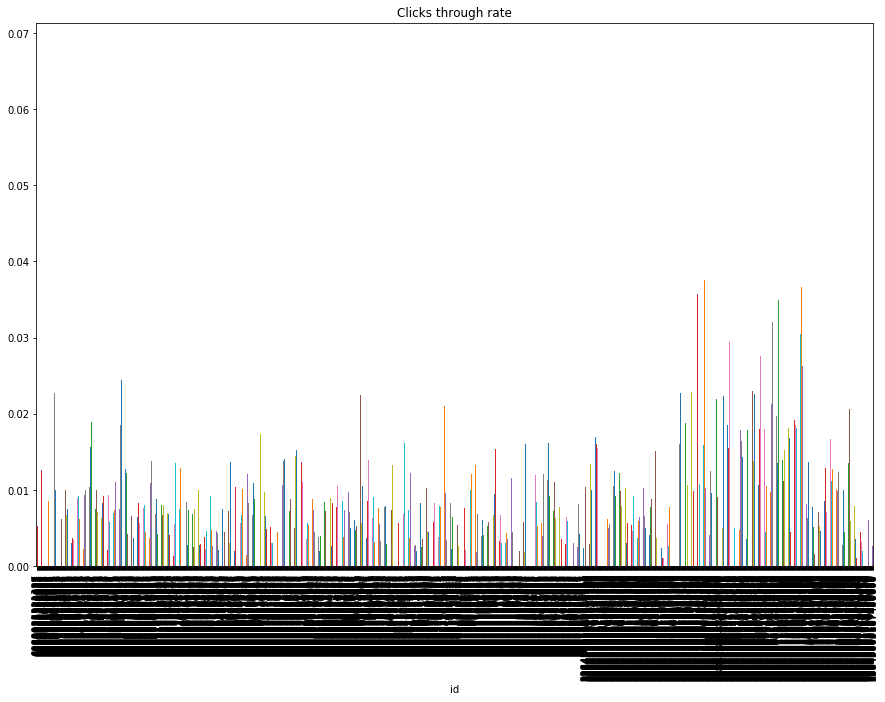

In [42]:
AD_counts['CTR'].plot(kind='bar',title="Clicks through rate",figsize=(15,10))

In [43]:
Date=rbull.groupby('date')

In [45]:
Date_counts=Date.aggregate(sum)
Date_counts

,id,clicks,conversions,cost,impressions,Year,Month
date,,,,,,,
2018-05-01,2.288915e+18,227.0,86.0,723.899998,31500.0,193728.0,480.0
2018-05-02,2.265072e+18,224.0,84.0,647.050000,29390.0,191710.0,475.0
2018-05-03,2.288915e+18,221.0,70.0,630.000000,27139.0,193728.0,480.0
2018-05-04,2.241230e+18,204.0,62.0,633.950000,23552.0,189692.0,470.0
2018-05-05,2.217387e+18,229.0,84.0,644.300000,29262.0,187674.0,465.0
2018-05-06,2.265072e+18,204.0,78.0,660.550003,26263.0,191710.0,475.0
2018-05-07,2.027869e+19,1244.0,289.0,3424.120000,139404.0,5749282.0,14245.0
2018-05-08,4.085465e+19,1276.0,355.0,4007.569998,189229.0,7313232.0,18120.0
2018-05-09,4.189975e+19,1058.0,251.0,3370.030002,165738.0,6078216.0,15060.0


In [46]:
Date_counts['CTR']=Date_counts['clicks']/Date_counts['impressions']
Date_counts['CPS']=Date_counts['conversions']/Date_counts['cost']
Date_counts['CLPS']=Date_counts['clicks']/Date_counts['cost']
Date_counts

,id,clicks,conversions,cost,impressions,Year,Month,CTR,CPS,CLPS
date,,,,,,,,,,
2018-05-01,2.288915e+18,227.0,86.0,723.899998,31500.0,193728.0,480.0,0.007206,0.118801,0.313579
2018-05-02,2.265072e+18,224.0,84.0,647.050000,29390.0,191710.0,475.0,0.007622,0.129820,0.346187
2018-05-03,2.288915e+18,221.0,70.0,630.000000,27139.0,193728.0,480.0,0.008143,0.111111,0.350794
2018-05-04,2.241230e+18,204.0,62.0,633.950000,23552.0,189692.0,470.0,0.008662,0.097800,0.321792
2018-05-05,2.217387e+18,229.0,84.0,644.300000,29262.0,187674.0,465.0,0.007826,0.130374,0.355424
2018-05-06,2.265072e+18,204.0,78.0,660.550003,26263.0,191710.0,475.0,0.007768,0.118083,0.308834
2018-05-07,2.027869e+19,1244.0,289.0,3424.120000,139404.0,5749282.0,14245.0,0.008924,0.084401,0.363305
2018-05-08,4.085465e+19,1276.0,355.0,4007.569998,189229.0,7313232.0,18120.0,0.006743,0.088582,0.318397
2018-05-09,4.189975e+19,1058.0,251.0,3370.030002,165738.0,6078216.0,15060.0,0.006384,0.074480,0.313944


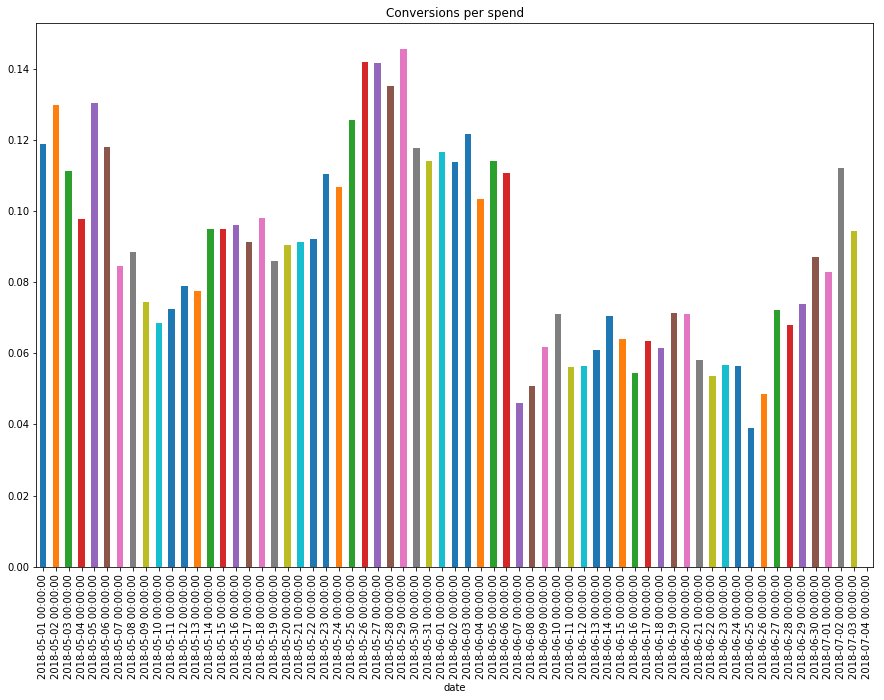

In [48]:
Date_counts['CPS'].plot(kind='bar',title="Conversions per spend",figsize=(15,10))

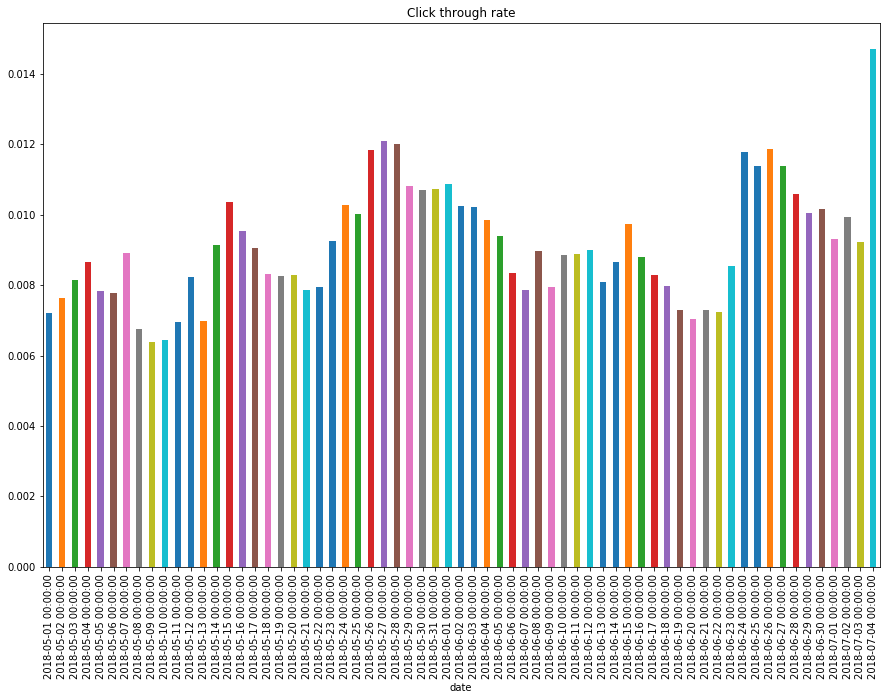

In [49]:
Date_counts['CTR'].plot(kind='bar',title="Click through rate",figsize=(15,10))

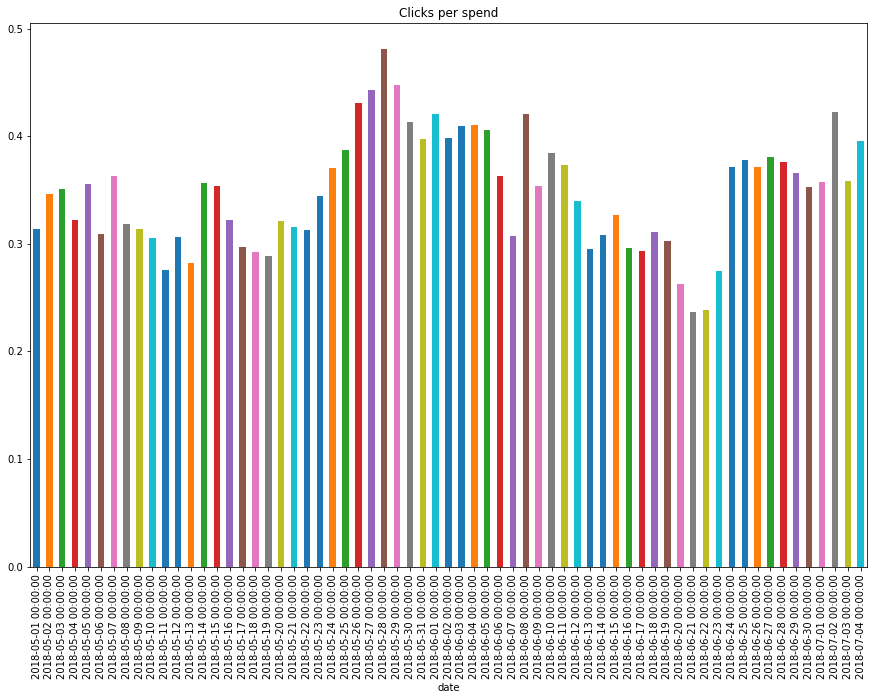

In [50]:
Date_counts['CLPS'].plot(kind='bar',title="Clicks per spend",figsize=(15,10))

In [51]:
ad_month=rbull.groupby(['Month','id'])

In [52]:
ad_month_counts=ad_month.aggregate(sum)
ad_month_counts

clicks  conversions        cost  impressions    Year
Month id                                                                     
5     6088935321237           0            0    6.400000           75   64576
      6088935321437           5            1   20.580000          536   78702
      6088935333637          13            2   89.070000         1572   78702
      6088935334437           2            0   25.480000          381   76684
      6088935350037           7            3   28.740000          624   72648
      6088935350837           0            0    0.450000           15   26234
      6088935363037           1            0    3.070000           41   42378
      6088935363237           3            0    7.120000           97   64576
      6088935365037           1            0    5.710000          107   62558
      6088935365837           2            1    5.420000           84   54486
      6088935384237           9            1   44.070000          877   78702
      6088935384437           3            1   23.010000          225   72648
      6088935385037           1            1   13.850000          290   78702
      6088935385237           0            0    0.020000            1    2018
      6088935395237         129           35  327.650000        10165   78702
      6088935396037           1            0    2.150000          107   50450
      6088935406837           3            0   13.560000          447   66594
      6088935418437           0            0    1.510000           82   42378
      6088935419237           4            1    8.240000          264   68612
      6088935430837           1            0    4.150000           69   58522
      6088935441237           0            0    1.420000           51   52468
      6088935442437          12            1   55.260000         1928   78702
      6088935443037           0            0    1.880000           35   36324
      6088935457837           2            0   13.070000          468   78702
      6088935458237           4            1   14.190000          634   76684
      6088935458437           0            0    2.140000           68   52468
      6088935458837           1            0    3.800000           86   66594
      6088935468437           0            0    2.450000           49   50450
      6088935468837           0            0    2.130000           23   32288
      6088935469637           5            2    9.570000          306   74666
...                         ...          ...         ...          ...     ...
7     6097842893237           9            3   22.410001          855   64576
      6097842893837           2            0    2.560000          117   52468
      6097842894437           0            0    4.640000          189   58522
      6097842894837           7            4   12.330000          449   44396
      6097842895037           2            1   17.389999          825   62558
      6097842895437           1            1   10.800000          437   34306
      6097842895637           5            2   18.969998          708   64576
      6097842897637           0            0    5.930000          248   64576
      6097842898037           0            0    5.500001          293   60540
      6097842898237           0            0    7.210000          265   60540
      23842806403070700       1            0   10.260000           85   14126
      23842807747820700      73            0  118.459999         3628  151350
      23842811497250700      96            0  175.370000         4031  151350
      23842811497270700       0            0   11.990000          283   24216
      23842818578090700       4            0    9.630000          270  104936
      23842818578100700      16            0   21.460000          818   30270
      23842818578110700       1            0    3.670000          122   36324
      23842818578180700       3            0   10.810000          374   50450
      23842818578190700       5            0   

In [53]:
ad_month_counts['CTR']=ad_month_counts['clicks']/ad_month_counts['impressions']
ad_month_counts['CPS']=ad_month_counts['conversions']/ad_month_counts['cost']
ad_month_counts['CLPS']=ad_month_counts['clicks']/ad_month_counts['cost']
ad_month_counts[87:127]

clicks  conversions         cost  impressions     Year  \
Month id                                                                      
5     6093228345437      12            1    20.550000         1559   385438   
      6093228345637      10            0    20.650000         1343   397546   
      6093228345837      10            3    13.920000          984   258304   
      6093228346037     137           41   498.790006        21337  1111918   
      6093228346237      25            5    90.960000         3294   296646   
      6093228346437       0            0     4.350000          292   151350   
      6093228346637       3            0     4.420000          371   173548   
      6093228346837      27            9   124.560000         4889   219962   
      6093228347037       2            0     2.730002          288   143278   
      6093228347237       2            0     5.470000          401   195746   
      6093228347437       6            0    12.970004         1135   254268   
      6093228351237     100           18   237.900005        18762   692174   
      6093228351437      12            1    65.230000         3863   189692   
      6093228351637     602          177  1775.700001        78222   829398   
      6093228351837      16            1    66.570000         3990   185656   
      6093228352037      15            2    68.830000         4031   193728   
      6093228352237     181           52   568.700000        26297   809218   
      6093228352437      36            5   111.350000         9531   966622   
      6093228352637      14            2    64.550000         4130   302700   
      6093228352837    1335          357  4391.559998       195801  1073576   
      6093228858837     550          216  1831.510002        38074  1035234   
      6093228859037      21            6    59.270000         3485   972676   
      6093228859237     348          123  1239.049998        26440   837470   
      6093228859437      66           29   327.220001         7043   724462   
      6093228859637     231           35   457.080001        17336   774912   
      6093228859837      15            4    69.380000         3210   367276   
      6093228860037      14            1    30.650000         1583   393510   
      6093228860237     470          109  1098.330000        39322  1148242   
      6093228860437     158           30   306.820005        14970  1089720   
      6093228860637     187           39   468.720007        20799   835452   
      6093228860837       3            1    30.840000         1474   383420   
      6093228861037      10            0    29.140000         2044   492392   
      6093228861237     344          130  1498.089995        37321   948460   
      6093228861437      48           15   188.429996         6716   956532   
      6093228861637      16            2    54.480000         3732   859668   
      6093228861837      25            2    63.430002         4039   669976   
      6093228862037       7            2    38.129999         2873   835452   
      6093228862237     152           60   628.380002        19551   815272   
      6093425907037     102           15   396.660001        22038   797110   
      6093425907237      68           10   241.129999        15197   944424   

                          CTR       CPS      CLPS  
Month id                                           
5     6093228345437  0.007697  0.048662  0.583942  
      6093228345637  0.007446  0.000000  0.484262  
      6093228345837  0.010163  0.215517  0.718391  
      6093228346037  0.006421  0.082199  0.274665  
      6093228346237  0.007590  0.054969  0.274846  
      6093228346437  0.000000  0.000000  0.000000  
      6093228346637  0.008086  0.000000  0.678733  
      6093228346837  0.005523  0.072254  0.216763  
      6093228347037  0.006944  0.000000  0.732600  
      6093228347237  0.004988  0.000000  0.365631  
      6093228347437  0.005286  0.000000  0.462606  
      6093228351237  0.005

In [54]:
data = ad_month_counts['impressions']

{'boxes': [<matplotlib.lines.Line2D at 0x1a184d2c88>],
 'caps': [<matplotlib.lines.Line2D at 0x1a184cba20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a184bcf98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a184c38d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a184d25f8>,
  <matplotlib.lines.Line2D at 0x1a184cbe80>]}

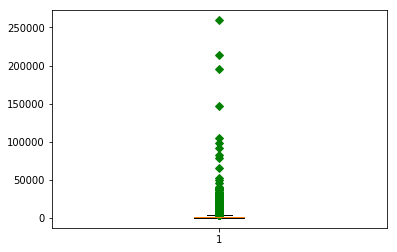

In [55]:
plt.boxplot(data, 0, 'gD')

In [56]:
data = ad_month_counts['clicks']

{'boxes': [<matplotlib.lines.Line2D at 0x1a18429358>],
 'caps': [<matplotlib.lines.Line2D at 0x1a184228d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a18415da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1a18415c18>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1a18429e10>,
  <matplotlib.lines.Line2D at 0x1a18422b38>]}

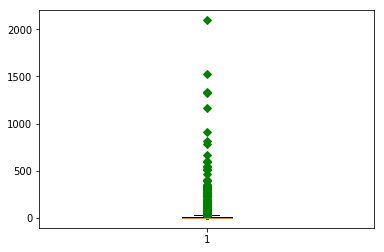

In [57]:
plt.boxplot(data, 0, 'gD')

In [241]:
c=[-0.010908389,-0.012454322,-0.007263485,-0.004090108,-0.0079094,-0.014042613
   ,-0.009459133,-0.006710828,-0.006137881,-0.01038369,-0.018283078,-0.004582536
   ,-0.007846568,-0.009453793,-0.013834003,-0.007624263,-0.007424942,-0.009494961
   ,-0.005714838,-0.009377984,-0.007826463,-0.008580985,-0.008256661,-0.006216636
   ,-0.005471505,-0.005539751,-0.00653486,-0.011380531,-0.007230205,-0.012952061,-0.009920118
   ,-0.005821606,-0.009195806,-0.004893864,-0.004380644,-0.006820747,-0.006050942
   ,-0.013722127,-0.010278802,-0.00739925,-0.012271258,-0.00759968,-0.008620668,-0.025592417]
A=[[1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
  1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0],
[-29.59883422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,-21.62497783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,-44.14817718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,-73.12104057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,-50.13776081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,-32.54228704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,-32.31339444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.84098553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.76238122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.70782116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-24.63546422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-70.42802267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-60.32657166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.71854704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-36.47061423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-48.12877590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.96566254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.33472494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-54.39413686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.50108421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-41.54789520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.95203129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-35.64419862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39.23568159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.88987257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-45.13562143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39.97665756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-29.97872728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.27355155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.25362532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-33.39253872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-42.37926243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.36286819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39.91356578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-45.29027532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-39.47964900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-37.49482624,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.81535948,0.0,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.97259423,0.0,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-42.25058602,0.0,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-34.93183862,0.0,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.38999917,0.0,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-35.13001946,0.0],
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-62.68568033]]
b=[100000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,
   -20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,
   -20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,
   -20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,
   -20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0,
   -20000.0,-20000.0,-20000.0,-20000.0,-20000.0,-20000.0]

In [258]:
k=500

In [259]:
x1_bounds=[k,None]
x2_bounds=[k,None]
x3_bounds=[k,None]
x4_bounds=[k,None]
x5_bounds=[k,None]
x6_bounds=[k,None]
x7_bounds=[k,None]
x8_bounds=[k,None]
x9_bounds=[k,None]
x10_bounds=[k,None]
x11_bounds=[k,None]
x12_bounds=[k,None]
x13_bounds=[k,None]
x14_bounds=[k,None]
x15_bounds=[k,None]
x16_bounds=[k,None]
x17_bounds=[k,None]
x18_bounds=[k,None]
x19_bounds=[k,None]
x20_bounds=[k,None]
x21_bounds=[k,None]
x22_bounds=[k,None]
x23_bounds=[k,None]
x24_bounds=[k,None]
x25_bounds=[k,None]
x26_bounds=[k,None]
x27_bounds=[k,None]
x28_bounds=[k,None]
x29_bounds=[k,None]
x30_bounds=[k,None]
x31_bounds=[k,None]
x32_bounds=[k,None]
x33_bounds=[k,None]
x34_bounds=[k,None]
x35_bounds=[k,None]
x36_bounds=[k,None]
x37_bounds=[k,None]
x38_bounds=[k,None]
x39_bounds=[k,None]
x40_bounds=[k,None]
x41_bounds=[k,None]
x42_bounds=[k,None]
x43_bounds=[k,None]
x44_bounds=[k,None]

In [260]:
res = linprog(c,A_ub=A,b_ub=b,bounds=(x1_bounds,x2_bounds,x3_bounds,x4_bounds,x5_bounds,x6_bounds,x7_bounds,x8_bounds,x9_bounds,
                      x10_bounds,x11_bounds,x12_bounds,x13_bounds,x14_bounds,x15_bounds,x16_bounds,x17_bounds,
                      x18_bounds,x19_bounds,x20_bounds,x21_bounds,x22_bounds,x23_bounds,x24_bounds,x25_bounds,
                      x26_bounds,x27_bounds,x28_bounds,x29_bounds,x30_bounds,x31_bounds,x32_bounds,x33_bounds,
                      x34_bounds,x35_bounds,x36_bounds,x37_bounds,x38_bounds,x39_bounds,x40_bounds,x41_bounds,x42_bounds,x43_bounds,x44_bounds),method='interior-point',options={"disp": True})

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 0.604445598         -                1.0                 -233.6517296222     
7.343091178499e-05  7.343091183399e-05  4.438856580025e-05  0.9999265690882  7.343091187998e-05  -819.9174546404     
1.236608204165e-05  1.23660820499e-05   7.47522580144e-06   0.8344718626837  1.236608205765e-05  -902.3904844413     
5.101153091354e-06  5.101153094754e-06  3.083617841071e-06  0.6484166005452  5.10115309795e-06   -1875.247234359     
4.662880427468e-08  4.662880430536e-08  2.818684530226e-08  0.9935726119395  4.662880433456e-08  -2144.78911717      
2.334687690169e-12  2.334713645903e-12  1.411093464299e-12  0.9999499974934  2.334714310199e-12  -2149.929234765     
1.103114437374e-16  1.165734490282e-16  0.0                 0.9999500691838  1.167357422322e-16  -2149.929491957     
Optimization terminated successfully.


In [261]:
print(res)

     con: array([], dtype=float64)
     fun: -2149.9294919574368
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([2.02417141e-08, 6.73739123e-07, 5.74444130e-07, 2.07408859e+03,
       1.65605203e+04, 5.06888041e+03, 9.78208845e-07, 6.27776899e-07,
       4.95336280e-07, 4.62980097e-07, 7.46749720e-07, 2.10882718e-07,
       1.52140113e+04, 1.01632858e+04, 5.96439349e-07, 1.08217864e-06,
       4.06438795e+03, 4.82831271e+02, 1.66736247e+03, 7.19706843e+03,
       2.50542106e+02, 7.73947601e+02, 4.76015646e+02, 6.04533852e-07,
       5.27263182e-07, 3.81431164e-07, 2.56781072e+03, 5.57058229e-07,
       7.16889190e-07, 1.63677578e+03, 9.23086191e-07, 6.82859536e-07,
       1.18963122e+03, 4.40682925e-07, 4.61743184e-07, 2.64513766e+03,
       5.68372343e-07, 4.94455890e-07, 7.01416866e-07, 7.43901182e-07,
       1.12529301e+03, 9.12241376e-07, 1.69499959e+03, 6.20966603e-07,
       4.70601356e+06])
  status: 0
 success: True
       x: array([  675.70228787